## Импорты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
%matplotlib inline

## Загрузка данных

### Игры

In [2]:
raw_df = pd.read_csv('./raw_games.csv')
raw_df.head()

,name,number,game_id,place,date
0,[music party],#9,65996,Old School Pub,"1 ноября, Среда"
1,[мультики],#8,65997,Papa' S Bar & Grill,"1 ноября, Среда"
2,[новички],#899,65984,Резиденция,"1 ноября, Среда"
3,"Квиз, плиз!",#899,65994,Chesterfield Bar,"1 ноября, Среда"
4,[HALLOWEEN],#3,65986,Резиденция,"31 октября, Вторник"


### Команды

In [3]:
games_df = pd.read_csv('./games.csv')
print(games_df.shape)
games_df.head()

(58369, 53)


/home/ilya/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (5,9,19,29,30,32,33,34,43,46,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Место,Ранг,Оскар,Название команды,Итого,1 раунд,2 раунд,3 раунд,4 раунд,5 раунд,...,Команда,9 раунд,Unnamed: 12,итог,ОСКАР,ИТОГО,ранг,оскар,Unnamed: 0,Название
0,1.0,NaN,NaN,Пивозавры,86.0,10.0,8.0,7.0,10.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,NaN,Bulle Mia,82.0,10.0,10.0,9.0,10.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,Кевин СПейсами,80.0,10.0,10.0,8.0,8.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,"ОПГ ""Чёрное поле""",73.0,10.0,5.0,7.0,8.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,Розовый вхламинго,67.0,9.0,8.0,8.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Препроцессинг

In [4]:
games_df = games_df.merge(raw_df, on='game_id')

Уберем тематические квизы, оставим только классические игры, извлечем дату, объединим столбцы с разными именами

In [5]:
games_df = games_df[(games_df['name'] == 'Квиз, плиз! ')]
games_df = games_df.drop(games_df.isnull().mean(axis=0).loc[lambda x: x > 0.99].index, axis=1)
games_df['Итого'] = games_df['Итого'].fillna(games_df['итого'])
games_df['number'] = games_df['number'].str.replace('#', '').astype(int)
games_df['День недели'] = games_df['date'].str.split(', ').str[-1].str.strip()

In [6]:
month_dict = {
    'января': 1,
    'февраля': 2,
    'марта': 3,
    'апреля': 4,
    'мая': 5,
    'июня': 6,
    'июля': 7,
    'августа': 8,
    'сентября': 9,
    'октября': 10,
    'ноября': 11,
    'декабря': 12
}
def process_date(x):
    dt, day_of_week = x.split(', ')
    day, month = dt.split()
    month_num = month_dict[month]
    return date(day=int(day), month=month_num, year=2023)

games_df['dt'] = games_df['date'].map(process_date)

## Анализ

В каких барах сложнее всего занимать призовые места?

In [7]:
games_df[games_df['Место'] == 1].groupby('place').filter(lambda x: x.size > 20).groupby('place')['Итого'].mean().sort_values(ascending=False)

place
Chesterfield Bar        52.374486
Известия Hall           52.214286
Резиденция              51.048387
CLUB LIBERTY BAR        51.027778
Дорогая, я перезвоню    49.424242
LUDI                    48.000000
Papa' S Bar & Grill     47.950000
Old School Pub          46.000000
Bla Bla Bar             45.666667
МИР                     42.500000
Name: Итого, dtype: float64

In [34]:
games_df[games_df['Место'] == 1].groupby('place').filter(lambda x: x.shape[0] >= 20).groupby('place')['Итого'].agg(['mean', 'size']).sort_values('mean', ascending=False)

,mean,size
place,,
Chesterfield Bar,52.374486,243
Резиденция,51.048387,124
CLUB LIBERTY BAR,51.027778,36
"Дорогая, я перезвоню",49.424242,33
Papa' S Bar & Grill,47.950000,20


Читеры

In [8]:
games_df[games_df['Итого'] == 60]

,Место,Название команды,Итого,1 раунд,2 раунд,3 раунд,4 раунд,5 раунд,6 раунд,7 раунд,game_id,итого,name,number,place,date,День недели,dt
24292,1.0,"Алиса, миелофон у меня!",60.0,6,6.0,6.0,12.0,6.0,6.0,18.0,58871,60.0,"Квиз, плиз!",844,Chesterfield Bar,"24 июня, Суббота",Суббота,2023-06-24
43747,1.0,"Мы-ей, а нам-она",60.0,6.0,6.0,6.0,12.0,6.0,6.0,18.0,53590,60.0,"Квиз, плиз!",801,CLUB LIBERTY BAR,"17 марта, Пятница",Пятница,2023-03-17


Сложность раундов - сколько баллов набирали топ-30 команд квиза в разрезе пакета вопросов

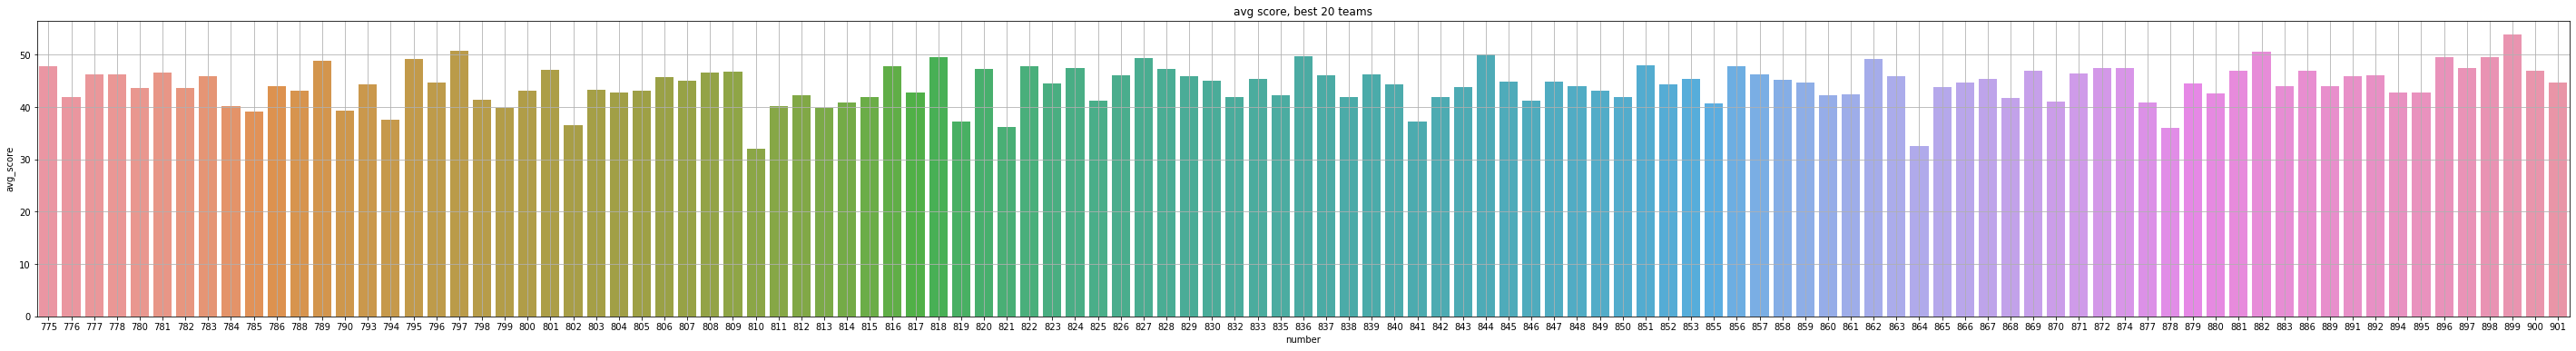

In [9]:
fig, ax = plt.subplots(figsize=(50, 6))
top_teams = games_df['Название команды'].value_counts().head(20).index
data = games_df[games_df['Название команды'].isin(top_teams)].groupby('number').filter(lambda x: x.shape[0] >= 10).groupby('number')['Итого'].mean().to_frame('avg_score').reset_index()
sns.barplot(data=data, x='number', y='avg_score', ax=ax)
plt.title('avg score, best 20 teams')
plt.grid();

In [12]:
data.set_index('number')['avg_score'].describe()

count    111.000000
mean      44.284859
std        3.739127
min       32.000000
25%       42.075000
50%       44.642857
75%       46.881410
max       53.866667
Name: avg_score, dtype: float64

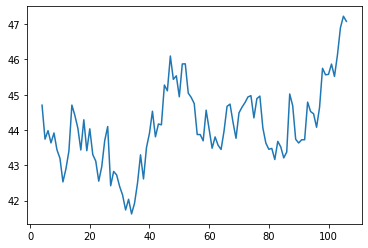

In [17]:
data['avg_score'].rolling(window=9, center=True).mean().plot.line()

### Петушиная статистика

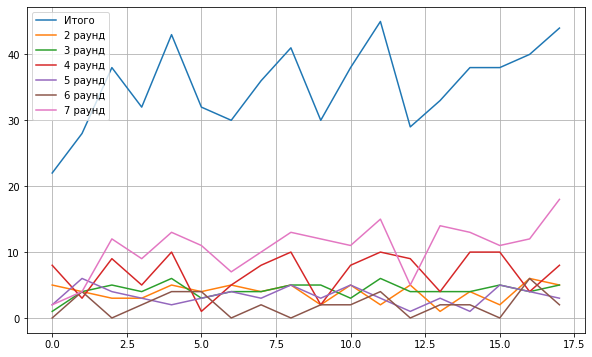

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
our_df = games_df[games_df['Название команды'] == 'Москва-Петушок Большая Кокоша'].sort_values('number')
our_df.reset_index(drop=True).iloc[:, 2:10].plot.line(ax=ax)
plt.grid()

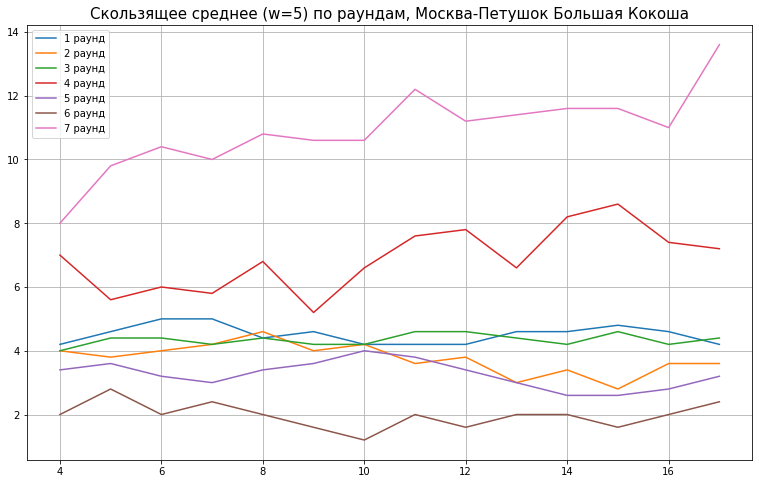

In [20]:
fig, ax = plt.subplots(figsize=(13,8))
our_df.reset_index(drop=True).iloc[:, 3:10].rolling(window=5).mean().plot.line(ax=ax)
plt.grid()
plt.title('Скользящее среднее (w=5) по раундам, Москва-Петушок Большая Кокоша', fontsize=15);

### В какой день куда идем

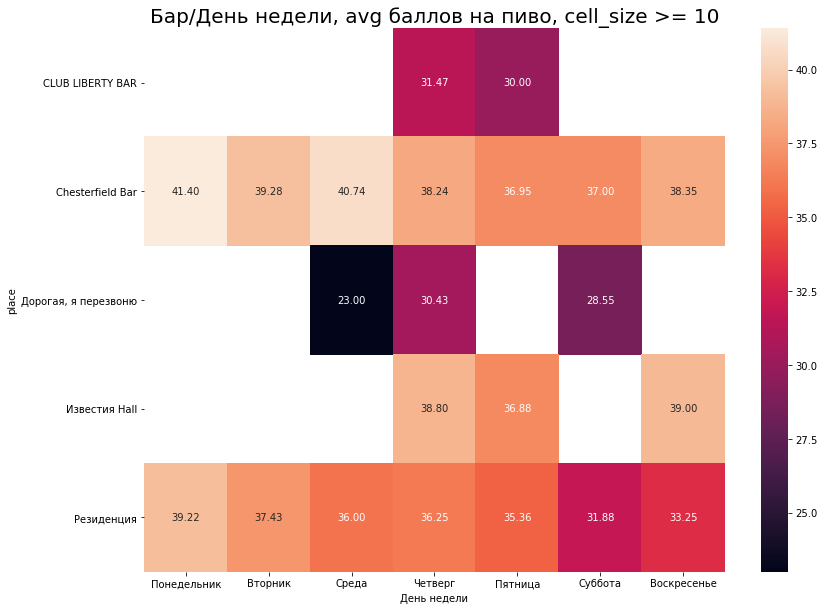

In [22]:
fig, ax = plt.subplots(figsize=(13, 10))
data = games_df[(games_df['Место'] == 13) & (games_df['place'].isin(['CLUB LIBERTY BAR', 'Chesterfield Bar', 'Дорогая, я перезвоню', 'Известия Hall', 'Резиденция']))].groupby(['place', 'День недели']).filter(lambda x: x.size >= 10).groupby(['place', 'День недели'])['Итого'].mean().reset_index()
data = pd.pivot_table(data, index='place', columns='День недели', values='Итого')
data = data[['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']]
sns.heatmap(data=data, annot=True, fmt=".2f", ax=ax)
plt.title('Бар/День недели, avg баллов на пиво, cell_size >= 10', fontsize=20);

### Детекция читинга

Правда ли в последний день розыгрыша пака вопросов набирают больше в среднем баллов, чем в первый

In [98]:
# Чтобы исключить влияние вместимости бара, возьмем игры, которые играли несколько раз в одном баре,
# например, Честерфилде
filt_df = games_df[games_df['place'] == 'Chesterfield Bar']

# Для очистки от шума оставим только высокие места, так как если читинг есть, то читеры вряд ли болтаются
# в хвосте
filt_df = filt_df[filt_df['Место'] <= 10]

print(filt_df.shape)

(2436, 18)


In [99]:
# Сколько раз в Честерфилде играют один и тот же пак вопросов
filt_df.groupby('number')['game_id'].nunique().value_counts().sort_index()

1    44
2    37
3    39
4     2
Name: game_id, dtype: int64

In [100]:
# Возьмем 3+ (Чтоб точно было время слить вопросы)
filt_df = filt_df.groupby('number').filter(lambda x: x['game_id'].nunique() >= 3)
print(filt_df.shape)

(1252, 18)


In [101]:
# Добавим столбец pack_session_num - порядковый номер дня, в который играли фиксированный пак вопросов

flat_list = []
for i, gr in filt_df.groupby('number'):
    game_dict = {i: v for v, i in enumerate(sorted(gr['dt'].unique()))}
    gr['pack_session_num'] = gr['dt'].map(game_dict)
    flat_list.append(gr)
    
filt_df = pd.concat(flat_list, axis=0, ignore_index=True)

filt_df.head()

,Место,Название команды,Итого,1 раунд,2 раунд,3 раунд,4 раунд,5 раунд,6 раунд,7 раунд,game_id,итого,name,number,place,date,День недели,dt,pack_session_num
0,1.0,Немолодые ветра,50.0,4.0,5.0,5.0,8.0,6,4.0,18.0,50521,50.0,"Квиз, плиз!",776,Chesterfield Bar,"19 января, Четверг",Четверг,2023-01-19,2
1,2.0,Кот да винчик,48.0,4.0,5.0,5.0,6.0,6,4.0,18.0,50521,48.0,"Квиз, плиз!",776,Chesterfield Bar,"19 января, Четверг",Четверг,2023-01-19,2
2,3.0,CD,48.0,4.0,6.0,5.0,8.0,6,4.0,15.0,50521,48.0,"Квиз, плиз!",776,Chesterfield Bar,"19 января, Четверг",Четверг,2023-01-19,2
3,4.0,Горид,45.0,5.0,4.0,6.0,4.0,6,2.0,18.0,50521,45.0,"Квиз, плиз!",776,Chesterfield Bar,"19 января, Четверг",Четверг,2023-01-19,2
4,5.0,"По***, ГОЙДА!",44.0,6.0,3.0,4.0,8.0,5,2.0,16.0,50521,44.0,"Квиз, плиз!",776,Chesterfield Bar,"19 января, Четверг",Четверг,2023-01-19,2


In [102]:
agg_df = filt_df.groupby(['number', 'pack_session_num'])['Итого'].mean().to_frame('avg').reset_index()
agg_df.head()

,number,pack_session_num,avg
0,776,0,44.4
1,776,1,47.8
2,776,2,44.4
3,780,0,42.3
4,780,1,46.6


In [103]:
pivot_df = pd.pivot_table(data=agg_df, index='number', columns='pack_session_num', values='avg')
pivot_df['first_day_avg'] = pivot_df[0]
pivot_df['last_day_avg'] = pivot_df[3].fillna(pivot_df[2].fillna(pivot_df[1]))

pivot_df

pack_session_num,0,1,2,3,first_day_avg,last_day_avg
number,,,,,,
776,44.4,47.800000,44.400000,NaN,44.4,44.400000
780,42.3,46.600000,42.100000,NaN,42.3,42.100000
783,50.0,50.600000,46.300000,NaN,50.0,46.300000
786,46.9,47.800000,48.500000,NaN,46.9,48.500000
789,45.3,48.090909,48.272727,NaN,45.3,48.272727
793,38.9,41.500000,42.300000,NaN,38.9,42.300000
796,44.6,50.700000,46.100000,NaN,44.6,46.100000
799,36.6,34.600000,44.100000,44.5,36.6,44.500000
802,36.8,40.500000,40.000000,NaN,36.8,40.000000


In [104]:
first = pivot_df['first_day_avg']
last = pivot_df['last_day_avg']

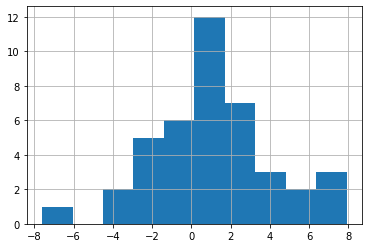

In [105]:
(last-first).hist()

In [106]:
from scipy.stats import wilcoxon, ttest_1samp
stat, pval = wilcoxon(first, last)

In [109]:
print(f'Средний дифф между баллами топ-10 в первый день розыгрыша пака и в последний равен {(last-first).mean()} баллов, p-value = {round(pval, 4)}')

Средний дифф между баллами топ-10 в первый день розыгрыша пака и в последний равен 1.0261640798226166 баллов, p-value = 0.0401
